In [1]:
import pandas as pd
import numpy as np
from altair import *

In [2]:
data = pd.read_csv('/data/pokemon/Pokemon.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
stat_subset = data.loc[:, ['Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Speed']]

In [5]:
stat_subset.rename_axis(lambda x: x.replace(' ', '_').replace('.',''), inplace=True, axis='columns')

In [6]:
stat_subset.head()

,Name,Type_1,Type_2,HP,Attack,Defense,Speed
0,Bulbasaur,Grass,Poison,45,49,49,45
1,Ivysaur,Grass,Poison,60,62,63,60
2,Venusaur,Grass,Poison,80,82,83,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80
4,Charmander,Fire,NaN,39,52,43,65


In [7]:
stat_subset.set_index(['Name', 'Type_1', 'Type_2'], inplace=True)

In [8]:
stat_subset_stack = stat_subset.stack().reset_index()

In [9]:
stat_subset_stack.columns = ['Name', 'Type_1', 'Type_2', 'Stat', 'Value']

In [11]:
melted_corr = pd.melt(stat_subset.corr().reset_index(), id_vars='index')

In [22]:
stat_subset_stack.head()

,Name,Type_1,Type_2,Stat,Value
0,Bulbasaur,Grass,Poison,HP,45
1,Bulbasaur,Grass,Poison,Attack,49
2,Bulbasaur,Grass,Poison,Defense,49
3,Bulbasaur,Grass,Poison,Speed,45
4,Ivysaur,Grass,Poison,HP,60


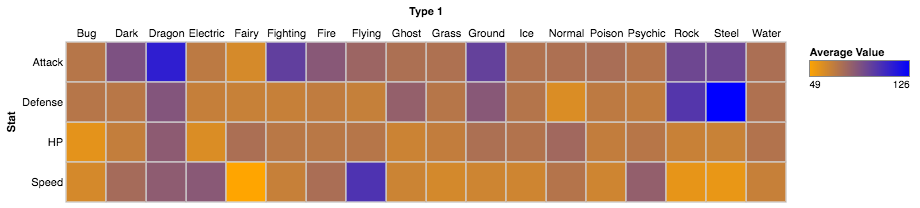

In [94]:
Chart(stat_subset_stack).mark_square().encode(
    Column('Type_1', title='Type 1'),
    Row('Stat'),
    Color('Value', aggregate='average', title='Average Value', scale=Scale(range=['orange', 'blue']))
).configure_mark(size=1500).configure_scale(bandSize=40)

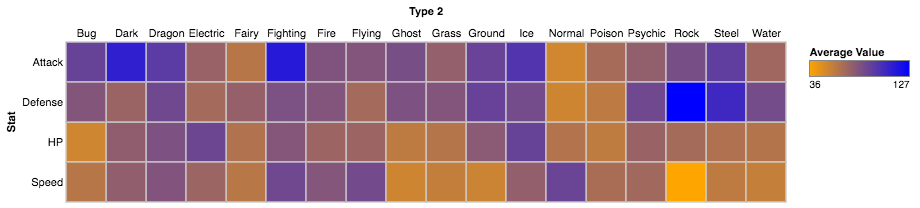

In [80]:
Chart(stat_subset_stack).mark_square().encode(
    Column('Type_2', title='Type 2'),
    Row('Stat'),
    Color('Value', aggregate='average', title='Average Value', scale=Scale(range=['orange', 'blue']))
).configure_mark(size=1500).configure_scale(bandSize=40).transform_data(
    filter=(expr.df.Type_2)
)